# Ejemplo de Clasificación

### Instalación de bibliotecas necesarias para el análisis de los datos

In [1]:
#
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing

import statsmodels.api as sm
#import statsmodels.formula.api as smf

plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')

/Applications/anaconda/envs/PythonData/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Cargamos la base de datos

In [2]:
# 
df = pd.read_excel('Default.xlsx')

df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
# factorize: tree  elements (array, index and type)
df.default.factorize()

(array([0, 0, 0, ..., 0, 0, 0]), Index(['No', 'Yes'], dtype='object'))

In [4]:
df.default.factorize()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
# We factorize, the function returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 

df['default2'] = df.default.factorize()[0]

df['student2'] = df.student.factorize()[0]

df.head()

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


### Gráficas

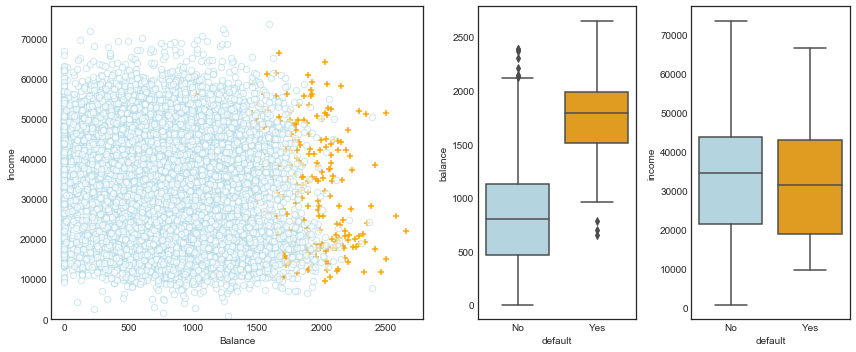

In [6]:
# Configuramos gráfica
fig = plt.figure(figsize = (12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Tomamos una fracción de los datos donde default es 'no'
df_no = df[df.default2 == 0] #.sample(frac = 0.15)

# Tomamos todos lo valores donde los datos muestran que default es 'yes'
df_yes = df[df.default2 == 1]

df_ = df_no.append(df_yes)

# Graficos de dispersión
ax1.scatter(df_[df_.default == 'Yes'].balance, 
            df_[df_.default == 'Yes'].income, 
            s = 40, c = 'orange', marker = '+',
            linewidths = 1)

ax1.scatter(df_[df_.default == 'No'].balance, 
            df_[df_.default == 'No'].income, 
            s = 40, marker = 'o', linewidths ='1',
            edgecolors='lightblue', facecolors ='white', 
            alpha = 0.6)

ax1.set_ylim(ymin = 0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin = -100)
ax1.set_xlabel('Balance')

# Graficos Box-Plot
c_palette = {'No':'lightblue', 'Yes':'orange'}

sns.boxplot('default', 'balance', data = df, orient= 'v', ax = ax2, palette = c_palette)
sns.boxplot('default', 'income', data = df, orient = 'v', ax = ax3, palette = c_palette)

gs.tight_layout(plt.gcf())

### Regresión Logística

In [7]:
# Creamos nuestras variables X e Y -- datos de entrenamiennto
X_train = df.balance.values.reshape(-1,1) 
y = df.default2

# Creamos nuestro set de datos de prueba
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

In [8]:
#
X_train

array([[ 729.52649521],
       [ 817.18040656],
       [1073.54916401],
       ...,
       [ 845.41198922],
       [1569.00905338],
       [ 200.92218263]])

In [9]:
#
X_test

array([[0.000e+00],
       [1.000e+00],
       [2.000e+00],
       ...,
       [2.652e+03],
       [2.653e+03],
       [2.654e+03]])

In [10]:
# Regresión

# Definimos el modelo
clf = skl_lm.LogisticRegression(solver = 'newton-cg')

# Estimamos el Modelo
clf.fit(X_train, y)

# Calculamos la probabilidad en el set de entrenamiento
prob = clf.predict_proba(X_test)

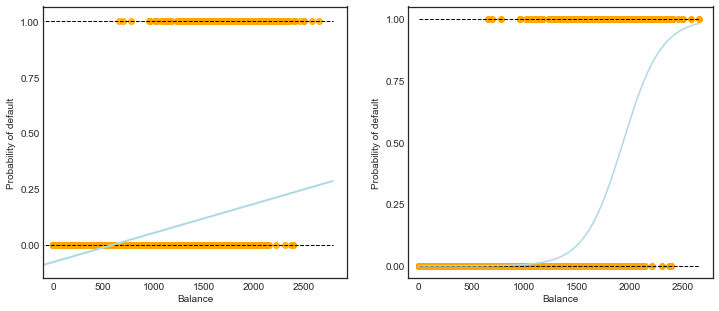

In [11]:
# Gráfica
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))

# Left plot
sns.regplot(df.balance, df.default2, order = 1, ci = None,
            scatter_kws = {'color':'orange'},
            line_kws = {'color':'lightblue', 'lw':2}, ax = ax1)

# Right plot
ax2.scatter(X_train, y, color = 'orange')
ax2.plot(X_test, prob[:,1], color  = 'lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin = ax.xaxis.get_data_interval()[0],
              xmax = ax.xaxis.get_data_interval()[1], linestyles = 'dashed', lw = 1)
    ax.hlines(0, xmin = ax.xaxis.get_data_interval()[0],
              xmax = ax.xaxis.get_data_interval()[1], linestyles = 'dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin = -100)

#### Estimación del modelo

In [12]:
# 
clf = skl_lm.LogisticRegression(solver='newton-cg')

X_train = df.balance.values.reshape(-1,1)

clf.fit(X_train, y)

print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

coefficients:  [[0.00549892]]
intercept : [-10.65133006]


In [13]:
# Regresión con Balance:
X_train = sm.add_constant(df.balance)

est = sm.Logit(y.ravel(), X_train).fit()

est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [14]:
print(est.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.4534
Time:                        00:53:47   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006

Possibly complete quasi-separation: A fraction 0.13

In [15]:
# Regresión con Student:
X_train = sm.add_constant(df.student2)
y = df.default2

est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


In [16]:
print(est.summary())

                           Logit Regression Results                           
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                0.004097
Time:                        00:53:59   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student2       0.4049      0.115      3.520      0.000       0.179       0.630


### Multiple Logistic Regression

In [17]:
#
X_train = sm.add_constant(df[['balance', 'income', 'student2']])

est = sm.Logit(y, X_train).fit()

est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


In [18]:
print(est.summary())

                           Logit Regression Results                           
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.4619
Time:                        00:54:02   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.7

In [19]:
# Confounding Matrix

# balance and default vectors for students
X_train = df[df.student == 'Yes'].balance.values.reshape(df[df.student == 'Yes'].balance.size,1) 
y = df[df.student == 'Yes'].default2

# balance and default vectors for non-students
X_train2 = df[df.student == 'No'].balance.values.reshape(df[df.student == 'No'].balance.size,1) 
y2 = df[df.student == 'No'].default2

# Vector with balance values for plotting
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver = 'newton-cg')
clf2 = skl_lm.LogisticRegression(solver = 'newton-cg')

clf.fit(X_train,y)
clf2.fit(X_train2,y2)

prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [20]:
df.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


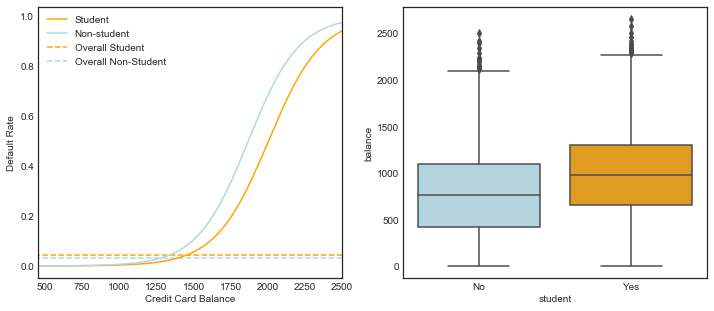

In [21]:
# creating plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.plot(X_test, pd.DataFrame(prob)[1], color='orange', label='Student')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='Non-student')
ax1.hlines(127/2817, colors='orange', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot('student', 'balance', data=df, orient='v', ax=ax2,  palette=c_palette)